In [4]:
import os

def get_data_ids(path_to_data):
    return os.listdir(path_to_data)

In [25]:
import pandas as pd
csvfile = pd.read_csv("../input/train_labels.csv")

    

In [26]:
csvfile.head()

,imageId,labelId
0,1,95 66 137 70 20
1,2,36 66 44 214 105 133
2,3,170 66 97 153 105 138
3,4,18 66 44 153 164
4,5,189 66 176 137 153 74 181 171 138


In [14]:
list(map(int, csvfile.labelId[0].split()))

[62, 17, 66, 214, 105, 137, 85]

In [5]:
# Get a sample of images and examine their sizes
SAMPLE_SIZE = 1000
import numpy as np

data_ids = get_data_ids("../input/validation")
data_ids = np.random.choice(data_ids, size=SAMPLE_SIZE, replace=False)

In [11]:
import data_utils as imat

img_shapes = []
for imgname in data_ids:
    path = os.path.join("../input/validation", imgname)
    img, _ = imat.load_img(path)
    img_shapes.append(img.shape)
img_shapes

[(586, 600, 3),
 (310, 310, 3),
 (550, 550, 3),
 (600, 589, 3),
 (600, 400, 3),
 (600, 236, 3),
 (600, 598, 3),
 (600, 600, 3),
 (600, 377, 3),
 (585, 585, 3),
 (600, 600, 3),
 (600, 600, 3),
 (600, 600, 3),
 (568, 600, 3),
 (560, 511, 3),
 (600, 600, 3),
 (600, 600, 3),
 (600, 600, 3),
 (600, 600, 3),
 (600, 600, 3),
 (600, 600, 3),
 (600, 600, 3),
 (600, 600, 3),
 (387, 570, 3),
 (600, 600, 3),
 (540, 540, 3),
 (600, 450, 3),
 (600, 600, 3),
 (585, 585, 3),
 (600, 459, 3),
 (600, 600, 3),
 (600, 600, 3),
 (552, 396, 3),
 (600, 400, 3),
 (600, 600, 3),
 (600, 600, 3),
 (600, 600, 3),
 (600, 600, 3),
 (400, 500, 3),
 (600, 521, 3),
 (600, 600, 3),
 (600, 600, 3),
 (500, 500, 3),
 (478, 478, 3),
 (600, 600, 3),
 (600, 600, 3),
 (519, 350, 3),
 (348, 365, 3),
 (600, 600, 3),
 (600, 600, 3),
 (600, 600, 3),
 (527, 600, 3),
 (600, 578, 3),
 (600, 510, 3),
 (600, 600, 3),
 (600, 600, 3),
 (600, 600, 3),
 (600, 448, 3),
 (600, 507, 3),
 (563, 600, 3),
 (500, 500, 3),
 (585, 585, 3),
 (560, 5

In [12]:
# Fix img_shapes by removing channels
img_shapes = [shape[:2] for shape in img_shapes]

In [14]:
unique_shapes = np.unique(img_shapes, axis=0)
len(unique_shapes)
unique_shapes

array([[210, 600],
       [239, 200],
       [243, 176],
       [277, 290],
       [300, 278],
       [300, 300],
       [309, 303],
       [309, 343],
       [310, 250],
       [310, 310],
       [313, 319],
       [318, 329],
       [319, 322],
       [325, 349],
       [336, 350],
       [341, 331],
       [348, 365],
       [350, 219],
       [350, 346],
       [350, 390],
       [351, 258],
       [357, 340],
       [359, 502],
       [366, 386],
       [377, 293],
       [383, 500],
       [384, 384],
       [387, 570],
       [391, 228],
       [391, 364],
       [397, 400],
       [400, 400],
       [400, 500],
       [400, 587],
       [400, 600],
       [401, 401],
       [405, 301],
       [405, 600],
       [408, 600],
       [409, 600],
       [415, 355],
       [415, 405],
       [416, 396],
       [420, 420],
       [420, 600],
       [421, 425],
       [423, 331],
       [423, 423],
       [424, 600],
       [425, 319],
       [425, 600],
       [427, 600],
       [429,

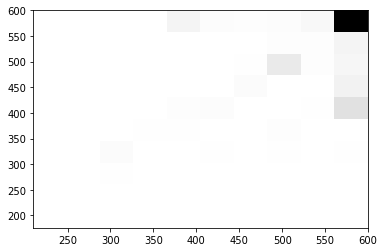

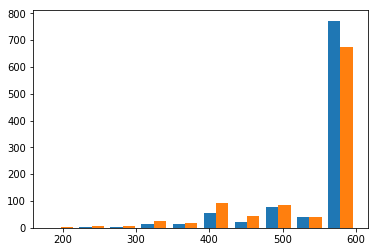

In [18]:
import matplotlib.pyplot as plt

np_img_shapes = np.array(img_shapes)
plt.hist2d(np_img_shapes[:,0], np_img_shapes[:,1], cmap='binary')
plt.show()

plt.hist(np_img_shapes)
plt.show()

In [27]:
top_label = 0
min_label = float('inf')
for i, labels in enumerate(csvfile.labelId):
    top_label = max(top_label, *map(int, labels.split()))
    min_label = min(min_label, *map(int, labels.split()))
top_label, min_label

(228, 1)

In [28]:
len(csvfile)

1014544

In [23]:
label_counts = [0 for i in range(top_label)]
label_arr = None
for i, labels in enumerate(csvfile.labelId):
    for label in map(int, labels.split()):
        label_counts[label - 1] += 1

print(label_counts)   

[36, 282, 24, 54, 195, 22, 224, 10, 314, 87, 64, 26, 47, 533, 178, 4, 4648, 525, 1621, 1986, 83, 12, 6, 59, 174, 225, 4, 101, 21, 74, 37, 112, 51, 36, 61, 653, 69, 148, 12, 103, 115, 42, 54, 1058, 653, 0, 264, 107, 1133, 11, 144, 70, 2574, 105, 108, 86, 23, 29, 661, 51, 83, 1093, 69, 22, 140, 7606, 31, 3, 63, 547, 105, 111, 254, 72, 88, 41, 84, 1371, 656, 17, 45, 25, 2, 6, 245, 1, 484, 213, 39, 28, 291, 98, 37, 5, 171, 17, 309, 1001, 233, 261, 166, 82, 145, 2, 3375, 1874, 2, 297, 53, 312, 1344, 19, 360, 152, 477, 279, 182, 40, 50, 20, 26, 271, 10, 24, 77, 118, 42, 260, 2, 45, 810, 126, 479, 19, 174, 125, 2158, 976, 38, 27, 230, 317, 269, 93, 2, 2, 361, 1154, 5, 146, 350, 47, 2765, 329, 245, 3, 1, 219, 130, 37, 0, 0, 1, 1991, 86, 138, 125, 97, 87, 143, 2494, 9, 13, 3, 907, 912, 25, 163, 3, 380, 438, 29, 129, 2678, 52, 392, 9, 35, 214, 723, 184, 173, 236, 287, 5, 46, 16, 4, 51, 48, 45, 11, 241, 363, 376, 8, 64, 47, 288, 644, 8, 85, 7, 1280, 8, 57, 190, 104, 10, 72, 3, 3388, 2, 210, 158, 

In [32]:
MAX_LABEL = 228
MIN_LABEL = 1
NUM_LABELS = MAX_LABEL - MIN_LABEL + 1

labels = np.zeros((len(csvfile), NUM_LABELS), dtype=np.int8)
for i, label_ids in enumerate(csvfile.labelId):
    labels[i, np.array(list(map(int, label_ids.split()))) - MIN_LABEL] = 1

labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [35]:
labels.size / 1024 / 1024 / 1024

0.21542984247207642

In [24]:
print([i+1 for i in range(len(label_counts)) if label_counts[i] == 0])

[46, 161, 162]
